## 0. Carga de Datos

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500)
pd.set_option('display.float_format', '{:.2f}'.format)

In [66]:
# Leer de nuevo el parquet
icfes = pd.read_parquet("C:/Users/CACTU/Downloads/Proyectos/prediccion-icfes-colombia/data/raw/icfes.parquet")
icfes.head(4)

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_ETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_DEPTO_UBICACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,COLOMBIA,M,18/02/2002,No,-,MAGDALENA,SANTA ANA,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,MÁS DE 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,SANTA ANA,MAGDALENA,SANTA ANA,MAGDALENA,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,509.421.557.404.314,2,2.00
1,COLOMBIA,M,28/06/2003,No,-,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,MÁS DE 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,NO OFICIAL,A,S,URBANO,COMPLETA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.767.864.431.576,3,4.00
2,COLOMBIA,M,2/06/2001,No,-,BOLIVAR,CARTAGENA DE INDIAS,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,CARTAGENA DE INDIAS,BOLIVAR,CARTAGENA DE INDIAS,BOLIVAR,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,507.642.383.644.749,2,3.00
3,COLOMBIA,M,26/04/2002,Si,Ninguno,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,3 a 4,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,No aplica,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,No,No,No,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 30 y 60 minutos,Más de 30 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,457.791.353.123.516,2,3.00


## 1. Renombrar Variables

In [67]:
### Renombramos las variables
icfes.columns = ["nacionalidad", "genero", "fecha_nac", "pertenece_etnia", "etnia_estudiante", "dpto_est_reside", 
                 "mpio_est_reside", "estrato_casa", "num_personas_casa", "num_cuartos_casa", "nivel_edu_padre", 
                 "nivel_edu_madre", "actividad_madre", "actividad_padre", "internet", "tv", "computador", "lavadora", 
                 "microndas", "carro", "moto", "consola", "num_libros", "freq_leche_derivados", "freq_carne_pescado_similares",
                 "freq_cereales_frutos_legumbres", "situacion_economica_casa", "tiempo_lectura", "tiempo_internet", 
                 "horas_trabajo_semanal", "tipo_remuneracion", "colegio_genero", "colegio_naturaleza", "colegio_calendario", 
                 "colegio_caracter", "colegio_area", "colegio_jornada", "colegio_mpio", "colegio_dpto", 
                 "est_mpio_presento_examen", "est_dpto_presento_examen", "puntaje_lectura", "percentil_lectura", 
                 "nivel_lectura", "puntaje_matematicas", "percentil_matematicas", "nivel_matematicas", "puntaje_naturales", 
                 "percentil_naturales", "nivel_naturales", "puntaje_sociales", "percentil_sociales", "nivel_sociales", 
                 "puntaje_ingles", "percentil_ingles", "nivel_ingles", "puntaje_global", "percentil_global", "inse_estudiante", 
                 "nse_estudiante", "nse_colegio"]

icfes.head(4)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,COLOMBIA,M,18/02/2002,No,-,MAGDALENA,SANTA ANA,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,MÁS DE 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,SANTA ANA,MAGDALENA,SANTA ANA,MAGDALENA,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,509.421.557.404.314,2,2.00
1,COLOMBIA,M,28/06/2003,No,-,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,MÁS DE 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,NO OFICIAL,A,S,URBANO,COMPLETA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.767.864.431.576,3,4.00
2,COLOMBIA,M,2/06/2001,No,-,BOLIVAR,CARTAGENA DE INDIAS,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,CARTAGENA DE INDIAS,BOLIVAR,CARTAGENA DE INDIAS,BOLIVAR,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,507.642.383.644.749,2,3.00
3,COLOMBIA,M,26/04/2002,Si,Ninguno,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,3 a 4,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,No aplica,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,No,No,No,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 30 y 60 minutos,Más de 30 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,457.791.353.123.516,2,3.00


In [68]:
import re

# Convertir nombres a snake_case y eliminar caracteres especiales
icfes.columns = [re.sub(r'\W+', '_', col.strip().lower()) for col in icfes.columns]

# Eliminar guiones bajos múltiples y al inicio/final
icfes.columns = [re.sub(r'_+', '_', col).strip('_') for col in icfes.columns]
print("Columnas renombradas:")
icfes.head(4)

Columnas renombradas:


,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,COLOMBIA,M,18/02/2002,No,-,MAGDALENA,SANTA ANA,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,MÁS DE 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,SANTA ANA,MAGDALENA,SANTA ANA,MAGDALENA,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,509.421.557.404.314,2,2.00
1,COLOMBIA,M,28/06/2003,No,-,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,MÁS DE 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,NO OFICIAL,A,S,URBANO,COMPLETA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.767.864.431.576,3,4.00
2,COLOMBIA,M,2/06/2001,No,-,BOLIVAR,CARTAGENA DE INDIAS,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,CARTAGENA DE INDIAS,BOLIVAR,CARTAGENA DE INDIAS,BOLIVAR,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,507.642.383.644.749,2,3.00
3,COLOMBIA,M,26/04/2002,Si,Ninguno,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,3 a 4,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,No aplica,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,No,No,No,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 30 y 60 minutos,Más de 30 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,457.791.353.123.516,2,3.00


## 2. Tipos de Datos Correctos

In [69]:
for col in icfes.select_dtypes(include=["int64", "float64"]).columns:
    n_unique = icfes[col].nunique()
    if n_unique < 20:  # arbitrario, pocos valores únicos
        print(f"⚠️ {col} es numérica pero parece categórica ({n_unique} valores únicos)")

⚠️ nivel_lectura es numérica pero parece categórica (4 valores únicos)
⚠️ nivel_matematicas es numérica pero parece categórica (4 valores únicos)
⚠️ nivel_naturales es numérica pero parece categórica (4 valores únicos)
⚠️ nivel_sociales es numérica pero parece categórica (4 valores únicos)
⚠️ nse_colegio es numérica pero parece categórica (4 valores únicos)


### 2.0 Reemplazar el símbolo "-" por NaN

In [70]:
### Cambiando el simbolo "-" por NaN para poder imputar después
# Lista para almacenar las columnas que contienen "-"
columnas_con_guion = [col for col in icfes.columns if "-" in icfes[col].astype(str).unique()]
print(columnas_con_guion)  # 🔍 Muestra las columnas que contienen "-"

for col in columnas_con_guion:
    icfes[col] = icfes[col].replace({"-": np.nan})

['genero', 'pertenece_etnia', 'etnia_estudiante', 'estrato_casa', 'num_personas_casa', 'num_cuartos_casa', 'nivel_edu_padre', 'nivel_edu_madre', 'actividad_madre', 'actividad_padre', 'internet', 'tv', 'computador', 'lavadora', 'microndas', 'carro', 'moto', 'consola', 'num_libros', 'freq_leche_derivados', 'freq_carne_pescado_similares', 'freq_cereales_frutos_legumbres', 'situacion_economica_casa', 'tiempo_lectura', 'tiempo_internet', 'horas_trabajo_semanal', 'tipo_remuneracion', 'percentil_global', 'inse_estudiante', 'nse_estudiante']


### 2.1 Variables Numéricas Almacenadas como Texto

In [71]:
icfes.sample(5)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
285534,COLOMBIA,F,28/10/2001,No,NaN,VALLE,CALI,Estrato 1,5 a 6,Dos,Primaria completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,No,No,No,No,No,11 A 25 LIBROS,Nunca o rara vez comemos eso,1 o 2 veces por semana,Nunca o rara vez comemos eso,Igual,Entre 30 y 60 minutos,30 minutos o menos,Menos de 10 horas,"Si, en especie",MIXTO,OFICIAL,A,S,URBANO,NOCHE,CALI,VALLE,CALI,VALLE,50,42,2,40,19,2,40,23,1,40,34,1,39.00,26,A-,211,27,385.354.621.804.579,1,3.00
19427,COLOMBIA,M,1/04/2003,No,NaN,BOGOTÁ,BOGOTÁ D.C.,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,MIXTO,OFICIAL,A,S,URBANO,TARDE,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,42,19,2,40,19,2,35,10,1,45,49,2,36.00,17,A-,201,21,NaN,None,3.00
108503,COLOMBIA,F,11/02/2002,No,NaN,BOGOTÁ,BOGOTÁ D.C.,Estrato 2,1 a 2,Uno,Primaria incompleta,Primaria incompleta,"Trabaja como profesional (por ejemplo médico, ...",Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,No,No,No,Si,Si,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Nunca o rara vez comemos eso,Mejor,No leo por entretenimiento,Entre 30 y 60 minutos,Entre 11 y 20 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,NOCHE,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,48,35,2,40,19,2,43,34,2,35,21,1,32.00,9,A-,204,23,501.505.354.846.927,2,3.00
14520,COLOMBIA,F,2/04/2002,No,NaN,ATLANTICO,BARRANQUILLA,Estrato 2,5 a 6,Cinco,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,No aplica,Pensionado,Si,Si,NaN,Si,Si,No,No,No,11 A 25 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Más de 2 horas,Entre 30 y 60 minutos,0,No,MIXTO,OFICIAL,A,S,URBANO,NOCHE,BARRANQUILLA,ATLANTICO,BARRANQUILLA,ATLANTICO,30,1,1,39,18,2,34,10,1,22,1,1,33.00,11,A-,157,3,541.525.567.213.515,3,2.00
439166,COLOMBIA,M,1/04/2002,No,NaN,BOLIVAR,TURBACO,Estrato 2,5 a 6,Uno,No sabe,No sabe,Es operario de máquinas o conduce vehículos (t...,"Trabaja como personal de limpieza, mantenimien...",No,No,No,Si,No,No,No,No,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,S,URBANO,UNICA,TURBACO,BOLIVAR,TURBACO,BOLIVAR,61,78,3,45,34,2,52,63,2,44,47,2,47.00,48,A-,251,55,389.666.751.889.966,1,2.00


In [72]:
# Convertir la columna a string primero para asegurar que podemos manipular el texto
icfes['inse_estudiante'] = icfes['inse_estudiante'].astype(str)

# Eliminar puntos y caracteres no numéricos
icfes['inse_estudiante'] = icfes['inse_estudiante'].str.replace('.', '')
icfes['inse_estudiante'] = icfes['inse_estudiante'].str.extract('(\d+)', expand=False)

# Tomar los primeros 4 dígitos y formatear como XX.XX
icfes['inse_estudiante'] = icfes['inse_estudiante'].str[:4]
icfes['inse_estudiante'] = icfes['inse_estudiante'].str[:2] + '.' + icfes['inse_estudiante'].str[2:]

# Convertir a float
icfes['inse_estudiante'] = pd.to_numeric(icfes['inse_estudiante'], errors='coerce')

icfes['inse_estudiante']

0        50.94
1        59.76
2        50.76
3        45.77
4        52.91
          ... 
546207   47.58
546208   57.40
546209   71.22
546210   38.13
546211   49.78
Name: inse_estudiante, Length: 546212, dtype: float64

In [73]:
icfes['nse_estudiante'].value_counts(dropna=False)

nse_estudiante
2       197566
3       193431
1        94455
4        43715
None     17041
NaN          4
Name: count, dtype: int64

In [74]:
icfes['nse_estudiante'] = pd.to_numeric(icfes['nse_estudiante'], errors='coerce')

In [75]:
icfes['nse_estudiante'].value_counts(dropna=False)

nse_estudiante
2.00    197566
3.00    193431
1.00     94455
4.00     43715
NaN      17045
Name: count, dtype: int64

In [76]:
icfes['percentil_global'].value_counts(dropna=False)

percentil_global
22     6443
69     6280
19     6183
3      6178
46     6111
       ... 
39     4405
36     4371
31     4320
56     4251
NaN      19
Name: count, Length: 101, dtype: int64

In [77]:
icfes['percentil_global'] = pd.to_numeric(icfes['percentil_global'], errors='coerce')
# Re calculamos el percentilo del puntaje global para rellenar
icfes['percentil_provisorio'] = icfes['puntaje_global'].rank(pct=True) * 100

comparacion = icfes.loc[icfes['percentil_global'].notna(), ['puntaje_global', 'percentil_global', 'percentil_provisorio']]
comparacion['diferencia'] = comparacion['percentil_global'] - comparacion['percentil_provisorio']

print(comparacion['diferencia'].describe())

count   546193.00
mean        -0.01
std          0.40
min         -0.97
25%         -0.29
50%          0.02
75%          0.27
max          1.00
Name: diferencia, dtype: float64


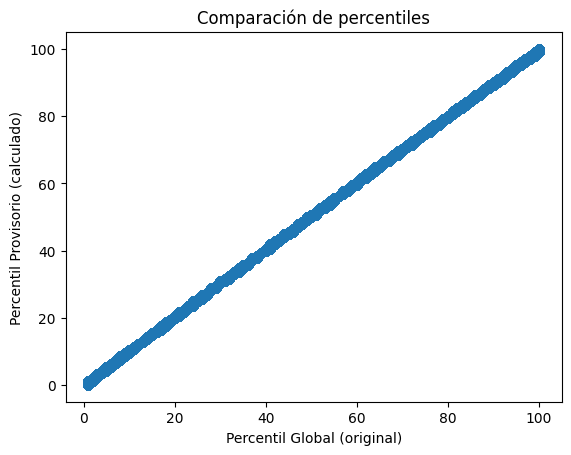

In [78]:
plt.scatter(comparacion['percentil_global'], comparacion['percentil_provisorio'], alpha=0.4)
plt.xlabel('Percentil Global (original)')
plt.ylabel('Percentil Provisorio (calculado)')
plt.title('Comparación de percentiles')
plt.show()

In [79]:
icfes['percentil_global'] = icfes['percentil_global'].fillna(icfes['percentil_provisorio']).round(0)
icfes['percentil_provisorio'] = icfes['puntaje_global'].rank(pct=True) * 100
icfes.drop(columns='percentil_provisorio', inplace=True)
icfes['percentil_global'].value_counts(dropna=False)

percentil_global
22.00    6443
69.00    6280
19.00    6183
3.00     6181
46.00    6111
         ... 
39.00    4405
36.00    4371
31.00    4321
56.00    4251
0.00        3
Name: count, Length: 101, dtype: int64

In [80]:
icfes.groupby('percentil_global')['puntaje_global'].agg(['min', 'max', 'mean']).reset_index().round(0)

,percentil_global,min,max,mean
0,0.00,82,139,102.00
1,1.00,0,152,142.00
2,2.00,150,156,153.00
3,3.00,157,161,159.00
4,4.00,162,165,163.00
...,...,...,...,...
96,96.00,336,341,338.00
97,97.00,341,347,344.00
98,98.00,347,355,351.00
99,99.00,355,367,361.00


### 2.2 Parsear Fechas

In [81]:
icfes.sample(6)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
258981,COLOMBIA,M,24/06/2002,No,NaN,VALLE,CALI,Estrato 2,1 a 2,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,Tiene un trabajo de tipo auxiliar administrati...,Si,Si,Si,Si,Si,No,No,Si,11 A 25 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,Nunca o rara vez comemos eso,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Más de 30 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,CALI,VALLE,CALI,VALLE,71,97,4,64,87,3,61,87,3,60,86,3,58.00,80,A2,318,91.00,50.76,2.00,2.00
502465,COLOMBIA,F,2/01/2003,No,NaN,BOGOTÁ,BOGOTÁ D.C.,NaN,3 a 4,Tres,NaN,None,Es dueño de un negocio pequeño (tiene pocos em...,"Trabaja en el hogar, no trabaja o estudia",NaN,None,Si,Si,Si,Si,No,No,NaN,None,NaN,None,Igual,NaN,None,0,No,MIXTO,NO OFICIAL,A,S,URBANO,COMPLETA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,58,71,3,60,77,3,42,31,2,47,56,2,56.00,74,A1,260,62.00,59.57,3.00,3.00
276824,COLOMBIA,F,11/08/2002,No,NaN,BOGOTÁ,BOGOTÁ D.C.,Estrato 5,3 a 4,Tres,Postgrado,Postgrado,"Trabaja como profesional (por ejemplo médico, ...","Trabaja como profesional (por ejemplo médico, ...",Si,Si,Si,Si,Si,Si,No,Si,26 A 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,3 a 5 veces por semana,Mejor,No leo por entretenimiento,Más de 3 horas,0,"Si, en efectivo",MIXTO,NO OFICIAL,A,S,URBANO,COMPLETA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,75,99,4,69,95,3,75,100,4,71,98,4,79.00,99,B+,365,99.00,76.77,4.00,4.00
518330,COLOMBIA,M,5/09/2002,No,NaN,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,5 a 6,Dos,No sabe,Secundaria (Bachillerato) incompleta,"Trabaja en el hogar, no trabaja o estudia",No aplica,No,No,Si,Si,No,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,30 minutos o menos,Entre 30 y 60 minutos,0,No,MIXTO,OFICIAL,A,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,63,83,3,69,94,3,74,100,4,71,98,4,52.00,63,A1,340,96.00,47.62,2.00,3.00
237216,COLOMBIA,M,31/08/2001,No,NaN,CESAR,SAN DIEGO,Estrato 2,3 a 4,Cuatro,Primaria incompleta,Primaria incompleta,No sabe,"Trabaja como personal de limpieza, mantenimien...",No,Si,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Igual,No leo por entretenimiento,Entre 30 y 60 minutos,0,No,MIXTO,OFICIAL,A,S,URBANO,MAÑANA,SAN DIEGO,CESAR,VALLEDUPAR,CESAR,54,57,3,48,42,2,52,65,2,62,89,3,66.00,92,A2,275,71.00,36.88,1.00,2.00
6037,COLOMBIA,F,23/04/2003,No,NaN,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,Si,Si,No,Si,11 A 25 LIBROS,3 a 5 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,NO OFICIAL,A,S,URBANO,COMPLETA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,66,91,4,50,49,2,47,47,2,56,77,3,58.00,79,A2,275,71.00,56.59,3.00,3.00


In [82]:
icfes['fecha_nac']

0         18/02/2002
1         28/06/2003
2          2/06/2001
3         26/04/2002
4          5/02/2002
             ...    
546207    25/02/1999
546208    14/10/2002
546209    22/11/2002
546210    10/11/2002
546211     2/06/2002
Name: fecha_nac, Length: 546212, dtype: object

In [83]:
prueba = pd.to_datetime(icfes['fecha_nac'], dayfirst=True, errors='coerce')
print(prueba.notna().mean())

0.9999926768361003


In [84]:
# Asegurarse de que la columna sea string
icfes['fecha_nac'] = icfes['fecha_nac'].astype(str)

# Intentar convertir a datetime; errores se vuelven NaT
fechas_dt = pd.to_datetime(icfes['fecha_nac'], dayfirst=True, errors='coerce')

# Filtrar las filas donde la conversión falló
fechas_invalidas = icfes[fechas_dt.isna()]

# Mostrar solo la columna de fechas inválidas como lista
print(fechas_invalidas['fecha_nac'].tolist())

['05/16/2001', '05/03/0002', '08/24/0002', '04/17/0002']


In [85]:
# Filtrar fechas donde el año parece raro o el mes > 12
fechas_invalidas = icfes[
    icfes['fecha_nac'].str.match(r'.*/(0{1,3}\d{1}|00\d{2})$') |  # años tipo 0002
    (icfes['fecha_nac'].str.split('/').str[1].astype(int) > 12)   # mes > 12
]

print(fechas_invalidas[['fecha_nac']])

         fecha_nac
105672  05/16/2001
428963  05/03/0002
451677  08/24/0002
503061  04/17/0002


In [86]:
# Cambiar una o varias fechas
icfes.loc[icfes['fecha_nac'] == '05/16/2001', 'fecha_nac'] = '16/05/2001'
icfes.loc[icfes['fecha_nac'] == '05/03/0002', 'fecha_nac'] = '05/03/2002'
icfes.loc[icfes['fecha_nac'] == '08/24/0002', 'fecha_nac'] = '24/08/2002'
icfes.loc[icfes['fecha_nac'] == '04/17/0002', 'fecha_nac'] = '17/04/2002'

In [87]:
icfes.sample(6)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
276938,COLOMBIA,F,25/05/2001,No,NaN,ANTIOQUIA,MEDELLÍN,Estrato 2,5 a 6,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja como personal de limpieza, mantenimien...",Si,No,No,Si,Si,No,Si,Si,11 A 25 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,No,FEMENINO,OFICIAL,A,S,URBANO,UNICA,MEDELLÍN,ANTIOQUIA,MEDELLÍN,ANTIOQUIA,61,80,3,57,68,3,46,43,2,55,75,2,58.00,78,A2,275,71.00,51.45,3.00,3.00
483463,COLOMBIA,F,23/08/2001,No,NaN,ANTIOQUIA,MEDELLÍN,Estrato 2,1 a 2,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,"Trabaja en el hogar, no trabaja o estudia",No,Si,Si,Si,No,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,No leo por entretenimiento,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,UNICA,MEDELLÍN,ANTIOQUIA,MEDELLÍN,ANTIOQUIA,62,81,3,37,13,2,28,2,1,35,20,1,44.00,39,A-,204,23.00,49.80,2.00,3.00
205039,COLOMBIA,F,11/03/2002,No,NaN,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,3 a 4,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,"Es dueño de un negocio grande, tiene un cargo ...",Es operario de máquinas o conduce vehículos (t...,Si,Si,No,Si,Si,No,No,No,0 A 10 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Mejor,30 minutos o menos,Entre 30 y 60 minutos,0,No,MIXTO,NO OFICIAL,OTRO,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,54,56,3,49,46,2,50,59,2,52,69,2,55.00,71,A1,258,60.00,55.11,3.00,2.00
304407,COLOMBIA,M,1/02/2003,No,NaN,BOGOTÁ,BOGOTÁ D.C.,Estrato 2,7 a 8,Cinco,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Tiene un trabajo de tipo auxiliar administrati...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,Si,No,Si,No,MÁS DE 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,Todos o casi todos los días,Mejor,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,62,82,3,58,73,3,60,86,3,61,87,3,61.00,85,A2,302,85.00,55.42,3.00,3.00
223650,COLOMBIA,F,5/04/1995,No,NaN,CUNDINAMARCA,SOACHA,Estrato 1,1 a 2,Uno,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Pensionado,No aplica,No,Si,Si,No,No,No,No,No,0 A 10 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,Todos o casi todos los días,Igual,30 minutos o menos,Entre 1 y 3 horas,Entre 21 y 30 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,NOCHE,SOACHA,CUNDINAMARCA,SOACHA,CUNDINAMARCA,57,66,3,58,71,3,50,57,2,55,76,2,48.00,52,A1,272,69.00,48.99,2.00,2.00
351956,COLOMBIA,F,17/07/2001,No,NaN,ANTIOQUIA,EL SANTUARIO,Estrato 2,1 a 2,Dos,Secundaria (Bachillerato) incompleta,Educación profesional completa,Es vendedor o trabaja en atención al público,"Trabaja como profesional (por ejemplo médico, ...",No,Si,No,No,No,No,No,No,0 A 10 LIBROS,Todos o casi todos los d

### 2.3 Variables Categóricas Mal Codificadas

In [88]:
# Usando filter con regex
cols_nivel = icfes.filter(regex='^nivel').columns.tolist()
print(cols_nivel)

['nivel_edu_padre', 'nivel_edu_madre', 'nivel_lectura', 'nivel_matematicas', 'nivel_naturales', 'nivel_sociales', 'nivel_ingles']


In [89]:
icfes[cols_nivel] = icfes[cols_nivel].astype('category')

In [90]:
print(icfes[cols_nivel].dtypes)

nivel_edu_padre      category
nivel_edu_madre      category
nivel_lectura        category
nivel_matematicas    category
nivel_naturales      category
nivel_sociales       category
nivel_ingles         category
dtype: object


## 3. Duplicados

In [91]:
# 1. Duplicados exactos
duplicados = icfes.duplicated().sum()
print(f'Filas duplicadas exactas: {duplicados}')

if duplicados > 0:
    print('\nEjemplo de filas duplicadas:')
print(icfes[icfes.duplicated(keep=False)].sort_values(by=icfes.columns.tolist()).head(10))

Filas duplicadas exactas: 0
Empty DataFrame
Columns: [nacionalidad, genero, fecha_nac, pertenece_etnia, etnia_estudiante, dpto_est_reside, mpio_est_reside, estrato_casa, num_personas_casa, num_cuartos_casa, nivel_edu_padre, nivel_edu_madre, actividad_madre, actividad_padre, internet, tv, computador, lavadora, microndas, carro, moto, consola, num_libros, freq_leche_derivados, freq_carne_pescado_similares, freq_cereales_frutos_legumbres, situacion_economica_casa, tiempo_lectura, tiempo_internet, horas_trabajo_semanal, tipo_remuneracion, colegio_genero, colegio_naturaleza, colegio_calendario, colegio_caracter, colegio_area, colegio_jornada, colegio_mpio, colegio_dpto, est_mpio_presento_examen, est_dpto_presento_examen, puntaje_lectura, percentil_lectura, nivel_lectura, puntaje_matematicas, percentil_matematicas, nivel_matematicas, puntaje_naturales, percentil_naturales, nivel_naturales, puntaje_sociales, percentil_sociales, nivel_sociales, puntaje_ingles, percentil_ingles, nivel_ingles, p

## 4. Rangos de Valores Válidos

### 4.1 Revisar y Corregir Valores Negativos Imposibles

In [92]:

# Seleccionar solo las columnas numéricas
nume_vars = icfes.select_dtypes(include=['int64', 'float64']).columns

# Lista para guardar las columnas con valores negativos o menores que 0
vars_con_negativos = []

# Recorrer cada columna numérica y revisar si tiene valores menores que 0
for col in nume_vars:
    if (icfes[col] < 0).any():
        vars_con_negativos.append(col)

# Mostrar resultados
if vars_con_negativos:
    print("Columnas con valores negativos o menores a 0:")
    for c in vars_con_negativos:
        print(f" - {c}: {icfes.loc[icfes[c] < 0, c].unique()[:10]}")  # primeros valores negativos encontrados
else:
    print("No se encontraron valores negativos en las columnas numéricas.")

No se encontraron valores negativos en las columnas numéricas.


### 4.2 Revisar Fechas Lógicas

In [93]:
fechas_1900 = icfes[icfes['fecha_nac'].str.endswith('1900')]
print(fechas_1900[['fecha_nac']])

        fecha_nac
91      1/01/1900
451     1/01/1900
464     1/01/1900
504     1/01/1900
751     1/01/1900
...           ...
544617  1/01/1900
544669  1/01/1900
545102  1/01/1900
545216  1/01/1900
546128  1/01/1900

[1851 rows x 1 columns]


In [94]:
icfes['fecha_nac'] = pd.to_datetime(icfes['fecha_nac'], dayfirst=True, errors='coerce')

# Reemplazar las fechas con año 1900 por NaT
icfes.loc[icfes['fecha_nac'].dt.year == 1900, 'fecha_nac'] = pd.NaT

# Verificar
print(icfes['fecha_nac'].isna().sum(), "fechas faltantes ahora")

1851 fechas faltantes ahora


## 5. Limpieza y Unificación de Categorías

### 5.1 Estandarizar formato de categorías

In [95]:
# Escribir en formato de Nombre Propio las categorías de las siguiente variables
nom_propio_cat = ["nacionalidad", "dpto_est_reside", "mpio_est_reside", "num_libros", "colegio_genero", "colegio_naturaleza",
                  "colegio_caracter", "colegio_area", "colegio_jornada", "colegio_mpio", "colegio_dpto", "est_mpio_presento_examen", 
                  "est_dpto_presento_examen"]

icfes[nom_propio_cat] = icfes[nom_propio_cat].apply(lambda x: x.str.title() if x.dtype == "object" else x)
icfes.head(4)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,Colombia,M,2002-02-18,No,NaN,Magdalena,Santa Ana,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,Más De 100 Libros,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,Santa Ana,Magdalena,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25.00,50.94,2.00,2.00
1,Colombia,M,2003-06-28,No,NaN,Bogotá,Bogotá D.C.,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,Más De 100 Libros,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83.00,59.76,3.00,4.00
2,Colombia,M,2001-06-02,No,NaN,Bolivar,Cartagena De Indias,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 Libros,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,Cartagena De Indias,Bolivar,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84.00,50.76,2.00,3.00
3,Colombia,M,2002-04-26,Si,Ninguno,Bogotá,Bogotá D.C.,Estrato 3,3 a 4,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,No aplica,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,No,No,No,No,No,11 A 25 Libros,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 30 y 60 minutos,Más de 30 horas,"Si, en efectivo",Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88.00,45.77,2.00,3.00


In [96]:
icfes['genero'].value_counts(dropna=False) 

genero
F      295994
M      250097
NaN       121
Name: count, dtype: int64

In [97]:
### Insertando NA's
icfes["genero"] = icfes["genero"].replace({'M': 'Masculino', 'F': 'Femenino'})

# Verificar los valores después del reemplazo
print(icfes["genero"].value_counts(dropna=False))  # Muestra también los NaN

genero
Femenino     295994
Masculino    250097
NaN             121
Name: count, dtype: int64


### 5.2 Homogenizar Valores Booleanos

In [98]:
icfes["internet"].value_counts(dropna = False)

internet
Si      314042
No      201199
NaN      22634
None      8337
Name: count, dtype: int64

In [99]:
icfes["computador"].value_counts(dropna = False)

computador
Si      295409
No      233827
NaN       8791
None      8185
Name: count, dtype: int64

In [100]:
icfes["lavadora"].value_counts(dropna = False)

lavadora
Si      405542
No      123912
NaN       9115
None      7643
Name: count, dtype: int64

In [101]:
icfes["microndas"].value_counts(dropna = False)

microndas
No      280967
Si      247694
NaN       8921
None      8630
Name: count, dtype: int64

In [102]:
icfes["carro"].value_counts(dropna = False)

carro
No      401388
Si      126735
NaN       9883
None      8206
Name: count, dtype: int64

In [103]:
icfes["moto"].value_counts(dropna = False)

moto
No      308054
Si      221051
None      8817
NaN       8290
Name: count, dtype: int64

In [104]:
icfes["consola"].value_counts(dropna = False)

consola
No      410475
Si      117642
NaN      10370
None      7725
Name: count, dtype: int64

In [105]:
columnas = ['pertenece_etnia', 'internet', 'tv', 'computador', 'lavadora', 'microndas', 'carro', 'moto', 'consola']

for col in columnas:
    icfes[col] = np.where(icfes[col] == 'Si', 1, 0)

In [106]:
icfes.sample(5)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
114251,Colombia,Masculino,2001-11-04,0,NaN,Bogotá,Bogotá D.C.,Estrato 2,5 a 6,Cuatro,Primaria incompleta,Secundaria (Bachillerato) completa,Pensionado,"Trabaja en el hogar, no trabaja o estudia",1,1,1,1,1,0,0,0,NaN,3 a 5 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,0,No,Mixto,Oficial,A,S,Urbano,Noche,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,41,17,2,39,18,2,42,31,2,46,53,2,47.00,48,A-,212,28.00,53.27,3.00,3.00
64939,Colombia,Femenino,2002-10-21,0,NaN,Cundinamarca,Quipile,Estrato 1,3 a 4,Dos,Primaria completa,Primaria completa,"Es agricultor, pesquero o jornalero","Es agricultor, pesquero o jornalero",0,0,0,0,0,0,0,0,0 A 10 Libros,1 o 2 veces por semana,1 o 2 veces por semana,Nunca o rara vez comemos eso,Igual,No leo por entretenimiento,30 minutos o menos,0,No,Mixto,Oficial,A,S,Urbano,Unica,Quipile,Cundinamarca,La Mesa,Cundinamarca,47,32,2,47,39,2,44,36,2,41,37,2,45.00,41,A-,224,36.00,32.95,1.00,2.00
209437,Colombia,Masculino,2001-04-11,0,NaN,Atlantico,Barranquilla,Estrato 2,5 a 6,Tres,Técnica o tecnológica incompleta,Secundaria (Bachillerato) incompleta,Es dueño de un negocio pequeño (tiene pocos em...,"Trabaja en el hogar, no trabaja o estudia",1,1,1,1,1,1,1,1,11 A 25 Libros,3 a 5 veces por semana,3 a 5 veces por semana,3 a 5 veces por semana,Mejor,30 minutos o menos,Más de 3 horas,Entre 11 y 20 horas,"Si, en efectivo",Mixto,No Oficial,A,S,Urbano,Completa,Barranquilla,Atlantico,Barranquilla,Atlantico,56,64,3,36,12,2,54,72,2,43,43,2,56.00,75,A1,240,47.00,57.47,3.00,2.00
61620,Colombia,Masculino,2001-03-24,0,NaN,Santander,Bucaramanga,Estrato 2,3 a 4,Dos,Primaria completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja como personal de limpieza, mantenimien...",0,0,0,1,0,0,1,0,26 A 100 Libros,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,30 minutos o menos,0,No,Mixto,Oficial,A,S,Urbano,Tarde,Bucaramanga,Santander,Bucaramanga,Santander,61,80,3,66,90,3,57,79,3,67,95,3,45.00,44,A-,307,87.00,44.02,2.00,2.00
199502,Colombia,Masculino,1998-10-23,0,NaN,Bolivar,Cartagena De Indias,NaN,None,NaN,NaN,NaN,None,NaN,0,0,0,0,0,0,0,0,None,NaN,None,NaN,None,NaN,None,NaN,None,Mixto,Oficial,A,N,Urbano,Mañana,Cartagena De Indias,Bolivar,Cartagena De Indias,Bolivar,39,12,2,28,3,1,36,13,1,27,4,1,23.00,1,A-,159,3.00,NaN,NaN,2.00


### 5.3 Recodificación semántica

#### 5.3.1 Variables Estudiante

In [107]:
icfes["etnia_estudiante"].value_counts(dropna = False).sort_index()

etnia_estudiante
Arhuaco                              97
Cancuamo                            156
Comunidad afrodescendiente        19534
Comunidades Rom (Gitanas)            13
Cubeo                               117
Emberá                             1153
Guambiano                           173
Huitoto                              92
Inga                                222
Ninguno                            4442
Otro grupo étnico minoritario      3150
Paez                               1891
Palenquero                           74
Pasto                              1537
Pijao                               703
Raizal                              382
Sikuani                             267
Tucano                               33
Wayúu                              2692
Zenú                               3281
NaN                              506203
Name: count, dtype: int64

In [108]:
icfes["etnia_estudiante"] = icfes["etnia_estudiante"].replace({
    np.nan: "No",
    'Comunidad afrodescendiente': 'Afro',
    'Comunidades Rom (Gitanas)': 'Gitano',
    'Ninguno': 'No',
    'Otro grupo étnico minoritario': 'Otra'
    })

icfes["etnia_estudiante"].value_counts(dropna = False).sort_index()

etnia_estudiante
Afro           19534
Arhuaco           97
Cancuamo         156
Cubeo            117
Emberá          1153
Gitano            13
Guambiano        173
Huitoto           92
Inga             222
No            510645
Otra            3150
Paez            1891
Palenquero        74
Pasto           1537
Pijao            703
Raizal           382
Sikuani          267
Tucano            33
Wayúu           2692
Zenú            3281
Name: count, dtype: int64

#### 5.3.2 Variables del Hogar

In [109]:
icfes["estrato_casa"].value_counts(dropna = False).sort_index()

estrato_casa
Estrato 1      159977
Estrato 2      188314
Estrato 3      108692
Estrato 4       25810
Estrato 5        8024
Estrato 6        3711
Sin Estrato     17177
NaN             34481
None               26
Name: count, dtype: int64

In [110]:
icfes["estrato_casa"] = icfes["estrato_casa"].replace({
    'Estrato 1': 'Estrato 1',
    'Estrato 2': 'Estrato 2',
    'Estrato 3': 'Estrato 3',
    'Estrato 4': 'Estrato 4',
    'Estrato 5': 'Estrato 5',
    'Estrato 6': 'Estrato 6',
    'Sin Estrato': np.nan,
    })

In [111]:
icfes["num_personas_casa"].value_counts()

num_personas_casa
3 a 4      257604
5 a 6      170028
7 a 8       44984
1 a 2       39843
9 o más     17760
Name: count, dtype: int64

In [112]:
icfes["num_personas_casa"] = icfes["num_personas_casa"].replace({
    '1 a 2': "Hogar tradicional", 
    '3 a 4': "Hogar tradicional", 
    '5 a 6': "Hogar grande", 
    '7 a 8': "Más de 1 hogar", 
    '9 o más': "Más de 1 hogar"
})

icfes["num_personas_casa"].value_counts()

num_personas_casa
Hogar tradicional    297447
Hogar grande         170028
Más de 1 hogar        62744
Name: count, dtype: int64

In [113]:
icfes['num_cuartos_casa'].value_counts(dropna = False)

num_cuartos_casa
Tres          207232
Dos           189042
Cuatro         70635
Uno            28276
Cinco          21966
Seis o mas     11903
NaN            10740
None            6418
Name: count, dtype: int64

In [114]:
icfes['num_cuartos_casa'] = icfes['num_cuartos_casa'].replace({
    'Uno': 1,
    'Dos': 2,
    'Tres': 3,
    'Cuatro': 4,
    'Cinco': 5,
    'Seis o mas': 6
})

icfes['num_cuartos_casa'].value_counts(dropna = False).sort_values(ascending=True)

num_cuartos_casa
6.00     11903
NaN      17158
5.00     21966
1.00     28276
4.00     70635
2.00    189042
3.00    207232
Name: count, dtype: int64

#### 5.3.3 Variables de Educación y Trabajo en el Hogar

In [115]:
icfes["nivel_edu_madre"].value_counts(dropna = False).sort_index(ascending = True)

nivel_edu_madre
Educación profesional completa           54474
Educación profesional incompleta         12384
Ninguno                                  12762
No Aplica                                 1081
No sabe                                   9275
Postgrado                                10805
Primaria completa                        53441
Primaria incompleta                      80062
Secundaria (Bachillerato) completa      136286
Secundaria (Bachillerato) incompleta     76353
Técnica o tecnológica completa           52949
Técnica o tecnológica incompleta         15973
NaN                                      30367
Name: count, dtype: int64

In [116]:
icfes["nivel_edu_madre"] = (
    icfes["nivel_edu_madre"]
    .astype(str)
    .replace({
        'Educación profesional completa': 'Profesional',
        'Educación profesional incompleta': 'Profesional Inc',
        'Ninguno': 'Ninguna',
        'No Aplica': 'No aplica',
        'No sabe': np.nan,
        'Primaria completa': 'Primaria',
        'Primaria incompleta': 'Primaria Inc',
        'Secundaria (Bachillerato) completa': 'Bachiller',
        'Secundaria (Bachillerato) incompleta': 'Bachiller Inc',
        'Técnica o tecnológica completa': 'Tecnico/Tecnologo',
        'Técnica o tecnológica incompleta': 'Tecnico/Tecnologo Inc'
    })
)


In [117]:
icfes["nivel_edu_padre"].value_counts(dropna = False).sort_index(ascending = True)

nivel_edu_padre
Educación profesional completa           46404
Educación profesional incompleta         10150
Ninguno                                  20106
No Aplica                                 6849
No sabe                                  32104
Postgrado                                 9437
Primaria completa                        54141
Primaria incompleta                     101387
Secundaria (Bachillerato) completa      117488
Secundaria (Bachillerato) incompleta     71295
Técnica o tecnológica completa           35367
Técnica o tecnológica incompleta         10957
NaN                                      30527
Name: count, dtype: int64

In [118]:
icfes["nivel_edu_padre"] = (
    icfes["nivel_edu_padre"]
    .astype(str)
    .replace({
  'Educación profesional completa': 'Profesional',
  'Educación profesional incompleta': 'Profesional Inc',
  'Ninguno': 'Ninguna',
  'No Aplica': 'No aplica',
  'No sabe': np.nan,
  'Primaria completa': 'Primaria',
  'Primaria incompleta': 'Primaria Inc',
  'Secundaria (Bachillerato) completa': 'Bachiller',
  'Secundaria (Bachillerato) incompleta': 'Bachiller Inc',
  'Técnica o tecnológica completa': 'Tecnico/Tecnologo',
  'Técnica o tecnológica incompleta': 'Tecnico/Tecnologo Inc'
})
)

icfes["nivel_edu_padre"].value_counts(dropna = False).sort_index(ascending = True)

nivel_edu_padre
Bachiller                117488
Bachiller Inc             71295
Ninguna                   20106
No aplica                  6849
Postgrado                  9437
Primaria                  54141
Primaria Inc             101387
Profesional               46404
Profesional Inc           10150
Tecnico/Tecnologo         35367
Tecnico/Tecnologo Inc     10957
nan                       30527
NaN                       32104
Name: count, dtype: int64

In [119]:
icfes["actividad_madre"].value_counts(dropna = False).sort_index()

actividad_madre
Es agricultor, pesquero o jornalero                                                                     78187
Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial                            12943
Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc    44247
Es operario de máquinas o conduce vehículos (taxita, chofer)                                            56948
Es vendedor o trabaja en atención al público                                                            31413
No aplica                                                                                               49029
No sabe                                                                                                 44249
Pensionado                                                                                              13006
Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)                  

In [120]:
# Definir el mapeo de categorías
mapeo = {
    # Profesionales y Directivos
    'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial': 'Directivos',
    'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)': 'Profesionales',

    # Trabajadores Independientes y Pequeños Empresarios
    'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc': 'Microempresario',
    'Trabaja por cuenta propia (por ejemplo plomero, electricista)': 'Trabajador Independiente',

    # Trabajadores Operativos y de Servicios
    'Es operario de máquinas o conduce vehículos (taxita, chofer)': 'Trabajadores Operativos',
    'Es vendedor o trabaja en atención al público': 'Trabajadores Operativos',
    'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)': 'Trabajadores Operativos',
    'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción': 'Trabajadores Operativos',
    
    # Trabajadores del Sector Primario
    'Es agricultor, pesquero o jornalero': 'Sector Primario',
    
    # Sin Actividad Laboral Remunerada
    'Trabaja en el hogar, no trabaja o estudia': 'Sin Actividad Remunerada',
    'Pensionado': 'Pensionado',
    
    # Datos No Disponibles
    'No aplica': 'No Aplica',
    'No sabe': 'Sin Información'
}

# Aplicar la reclasificación directamente a cada columna
icfes['actividad_madre'] = icfes['actividad_madre'].map(mapeo)
icfes['actividad_padre'] = icfes['actividad_padre'].map(mapeo)

In [121]:
icfes['actividad_padre'].value_counts(dropna = False)

actividad_padre
Sin Actividad Remunerada    213377
Trabajadores Operativos     140178
Microempresario              48129
Profesionales                41939
No Aplica                    27451
NaN                          17503
Sector Primario              17017
Trabajador Independiente     16550
Sin Información              11704
Directivos                    8707
Pensionado                    3657
Name: count, dtype: int64

In [122]:
icfes.head(4)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,Colombia,Masculino,2002-02-18,0,No,Magdalena,Santa Ana,Estrato 3,Hogar grande,5.00,Profesional,Bachiller,No Aplica,Sin Actividad Remunerada,1,1,0,1,1,0,0,0,Más De 100 Libros,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,Santa Ana,Magdalena,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25.00,50.94,2.00,2.00
1,Colombia,Masculino,2003-06-28,0,No,Bogotá,Bogotá D.C.,Estrato 3,Más de 1 hogar,3.00,Tecnico/Tecnologo,Tecnico/Tecnologo,Trabajador Independiente,Microempresario,1,1,1,1,1,1,0,0,Más De 100 Libros,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83.00,59.76,3.00,4.00
2,Colombia,Masculino,2001-06-02,0,No,Bolivar,Cartagena De Indias,Estrato 1,Hogar grande,2.00,Bachiller,Bachiller,Trabajadores Operativos,Trabajadores Operativos,0,1,0,1,0,0,0,0,26 A 100 Libros,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,Cartagena De Indias,Bolivar,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84.00,50.76,2.00,3.00
3,Colombia,Masculino,2002-04-26,1,No,Bogotá,Bogotá D.C.,Estrato 3,Hogar tradicional,2.00,Primaria Inc,Bachiller,No Aplica,Microempresario,0,0,1,0,0,0,0,0,11 A 25 Libros,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 30 y 60 minutos,Más de 30 horas,"Si, en efectivo",Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88.00,45.77,2.00,3.00


In [123]:
icfes["horas_trabajo_semanal"].value_counts()

horas_trabajo_semanal
0                      354503
Menos de 10 horas       97913
Entre 11 y 20 horas     41729
Más de 30 horas         19907
Entre 21 y 30 horas     15270
Name: count, dtype: int64

In [124]:
icfes["horas_trabajo_semanal"] = icfes["horas_trabajo_semanal"].replace({'0': 'No Trabaja',
        'Menos de 10 horas': 'Trabajo Ocasional',
        'Entre 11 y 20 horas': 'Tiempo Parcial Reducido',
        'Entre 21 y 30 horas': 'Medio Tiempo',
        'Más de 30 horas': 'Tiempo Completo'
})

icfes["horas_trabajo_semanal"].value_counts()

horas_trabajo_semanal
No Trabaja                 354503
Trabajo Ocasional           97913
Tiempo Parcial Reducido     41729
Tiempo Completo             19907
Medio Tiempo                15270
Name: count, dtype: int64

In [125]:
icfes["tipo_remuneracion"].value_counts()

tipo_remuneracion
No                           377436
Si, en efectivo              134786
Si, en especie                 8530
Si, en efectivo y especie      7361
Name: count, dtype: int64

In [126]:
icfes["tipo_remuneracion"] = icfes["tipo_remuneracion"].replace({'No': 'Sin Remuneración',
        'Si, en efectivo': 'Remuneración Monetaria',
        'Si, en especie': 'Remuneración No Monetaria',
        'Si, en efectivo y especie': 'Remuneración Mixta'})

icfes["tipo_remuneracion"].value_counts()

tipo_remuneracion
Sin Remuneración             377436
Remuneración Monetaria       134786
Remuneración No Monetaria      8530
Remuneración Mixta             7361
Name: count, dtype: int64

In [127]:
# Si "horas_trabajo_semanal" es "No Trabaja", cambiar "tipo_remuneracion" a "No Aplica"
icfes.loc[icfes["horas_trabajo_semanal"] == "No Trabaja", "tipo_remuneracion"] = "No Aplica"

#### 5.3.4 Variables de Entretenimiento

In [128]:
icfes.head(4)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,Colombia,Masculino,2002-02-18,0,No,Magdalena,Santa Ana,Estrato 3,Hogar grande,5.00,Profesional,Bachiller,No Aplica,Sin Actividad Remunerada,1,1,0,1,1,0,0,0,Más De 100 Libros,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,Santa Ana,Magdalena,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25.00,50.94,2.00,2.00
1,Colombia,Masculino,2003-06-28,0,No,Bogotá,Bogotá D.C.,Estrato 3,Más de 1 hogar,3.00,Tecnico/Tecnologo,Tecnico/Tecnologo,Trabajador Independiente,Microempresario,1,1,1,1,1,1,0,0,Más De 100 Libros,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83.00,59.76,3.00,4.00
2,Colombia,Masculino,2001-06-02,0,No,Bolivar,Cartagena De Indias,Estrato 1,Hogar grande,2.00,Bachiller,Bachiller,Trabajadores Operativos,Trabajadores Operativos,0,1,0,1,0,0,0,0,26 A 100 Libros,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,Cartagena De Indias,Bolivar,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84.00,50.76,2.00,3.00
3,Colombia,Masculino,2002-04-26,1,No,Bogotá,Bogotá D.C.,Estrato 3,Hogar tradicional,2.00,Primaria Inc,Bachiller,No Aplica,Microempresario,0,0,1,0,0,0,0,0,11 A 25 Libros,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 30 y 60 minutos,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88.00,45.77,2.00,3.00


In [129]:
icfes["num_libros"].value_counts(dropna = False)

num_libros
0 A 10 Libros        207526
11 A 25 Libros       153968
26 A 100 Libros      105653
NaN                   35998
Más De 100 Libros     34413
None                   8654
Name: count, dtype: int64

In [130]:
icfes["num_libros"] = icfes["num_libros"].replace({'0 A 10 Libros': '0-10', '11 A 25 Libros': '11-25',
                                                   '26 A 100 Libros': '26-100', 'Más De 100 Libros': '>100'})

icfes["num_libros"].value_counts(dropna = False)

num_libros
0-10      207526
11-25     153968
26-100    105653
NaN        35998
>100       34413
None        8654
Name: count, dtype: int64

In [131]:
icfes["tiempo_lectura"].value_counts(dropna = False)

tiempo_lectura
30 minutos o menos            199094
Entre 30 y 60 minutos         144272
No leo por entretenimiento     95621
Entre 1 y 2 horas              55480
NaN                            31108
Más de 2 horas                 20010
None                             627
Name: count, dtype: int64

In [132]:
icfes["tiempo_lectura"] = icfes["tiempo_lectura"].replace({'No leo por entretenimiento': 'No lee', '30 minutos o menos': '0-30 min',
                                                           'Entre 30 y 60 minutos': '30-60 min', 'Entre 1 y 2 horas': '1-2h', 'Más de 2 horas': '>2h'})

icfes["tiempo_lectura"].value_counts(dropna = False)

tiempo_lectura
0-30 min     199094
30-60 min    144272
No lee        95621
1-2h          55480
NaN           31108
>2h           20010
None            627
Name: count, dtype: int64

In [133]:
icfes["tiempo_internet"].value_counts(dropna = False)

tiempo_internet
Entre 1 y 3 horas        157557
Entre 30 y 60 minutos    134383
Más de 3 horas           100134
30 minutos o menos        90517
No Navega Internet        30697
None                      30298
NaN                        2626
Name: count, dtype: int64

In [134]:
icfes["tiempo_internet"] = icfes["tiempo_internet"].replace({'No Navega Internet': 'Ninguno', '30 minutos o menos': 'Poco',
                                                             'Entre 30 y 60 minutos': 'Moderado', 'Entre 1 y 3 horas': 'Promedio', 'Más de 3 horas': 'Mucho'})

icfes["tiempo_internet"].value_counts(dropna = False)

tiempo_internet
Promedio    157557
Moderado    134383
Mucho       100134
Poco         90517
Ninguno      30697
None         30298
NaN           2626
Name: count, dtype: int64

#### 5.3.5 Variables de Alimentación

In [135]:
icfes.head(5)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,Colombia,Masculino,2002-02-18,0,No,Magdalena,Santa Ana,Estrato 3,Hogar grande,5.00,Profesional,Bachiller,No Aplica,Sin Actividad Remunerada,1,1,0,1,1,0,0,0,>100,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,30-60 min,Moderado,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,Santa Ana,Magdalena,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25.00,50.94,2.00,2.00
1,Colombia,Masculino,2003-06-28,0,No,Bogotá,Bogotá D.C.,Estrato 3,Más de 1 hogar,3.00,Tecnico/Tecnologo,Tecnico/Tecnologo,Trabajador Independiente,Microempresario,1,1,1,1,1,1,0,0,>100,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,30-60 min,Moderado,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83.00,59.76,3.00,4.00
2,Colombia,Masculino,2001-06-02,0,No,Bolivar,Cartagena De Indias,Estrato 1,Hogar grande,2.00,Bachiller,Bachiller,Trabajadores Operativos,Trabajadores Operativos,0,1,0,1,0,0,0,0,26-100,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30-60 min,Mucho,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,Cartagena De Indias,Bolivar,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84.00,50.76,2.00,3.00
3,Colombia,Masculino,2002-04-26,1,No,Bogotá,Bogotá D.C.,Estrato 3,Hogar tradicional,2.00,Primaria Inc,Bachiller,No Aplica,Microempresario,0,0,1,0,0,0,0,0,11-25,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,0-30 min,Moderado,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88.00,45.77,2.00,3.00
4,Colombia,Masculino,2002-02-05,0,No,Bogotá,Bogotá D.C.,Estrato 3,Hogar tradicional,4.00,Bachiller,Bachiller Inc,Sin Actividad Remunerada,Sin Actividad Remunerada,1,1,1,1,1,0,0,0,26-100,Todos o casi todos los días,Nunca o rara vez comemos eso,Todos o casi todos los días,Mejor,No lee,Mucho,Tiempo Completo,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,63,85,3,57,70,3,55,74,2,57,79,3,52.00,63,A1,288,78.00,52.91,3.00,3.00


In [136]:
icfes["freq_leche_derivados"].value_counts()

freq_leche_derivados
1 o 2 veces por semana          170538
Todos o casi todos los días     160798
3 a 5 veces por semana          133932
Nunca o rara vez comemos eso     44252
Name: count, dtype: int64

In [137]:
icfes["freq_carne_pescado_similares"].value_counts()

freq_carne_pescado_similares
Todos o casi todos los días     209228
3 a 5 veces por semana          154432
1 o 2 veces por semana          124422
Nunca o rara vez comemos eso     25600
Name: count, dtype: int64

In [138]:
icfes["freq_cereales_frutos_legumbres"].value_counts()

freq_cereales_frutos_legumbres
1 o 2 veces por semana          198491
3 a 5 veces por semana          154261
Todos o casi todos los días      88346
Nunca o rara vez comemos eso     71536
Name: count, dtype: int64

In [139]:
mapping = {
    'Nunca o rara vez comemos eso': 'Muy Insuficiente',
    '1 o 2 veces por semana': 'Insuficiente',
    '3 a 5 veces por semana': 'Aceptable',
    'Todos o casi todos los días': 'Óptimo'
}

cols = ["freq_leche_derivados", 
        "freq_carne_pescado_similares", 
        "freq_cereales_frutos_legumbres"]

icfes[cols] = icfes[cols].replace(mapping)
icfes.sample(8)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
422273,Colombia,Femenino,2001-08-19,1,Paez,Cauca,Silvia,NaN,Hogar grande,5.00,Bachiller Inc,Tecnico/Tecnologo,Sin Información,Trabajadores Operativos,0,0,1,0,0,0,0,0,0-10,Óptimo,Óptimo,Aceptable,Igual,No lee,Moderado,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Silvia,Cauca,Silvia,Cauca,53,53,3,53,57,3,38,19,1,36,23,1,34.00,12,A-,221,34.00,48.67,2.00,2.00
430039,Colombia,Femenino,2002-02-05,0,No,Santander,Bucaramanga,Estrato 3,Hogar tradicional,3.00,Bachiller,Bachiller Inc,No Aplica,Sin Actividad Remunerada,1,1,1,0,0,0,0,0,0-10,Aceptable,Aceptable,Insuficiente,Igual,0-30 min,Promedio,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Bucaramanga,Santander,Bucaramanga,Santander,65,89,3,52,55,3,58,82,3,62,89,3,63.00,88,A2,298,83.00,48.58,2.00,3.00
57496,Colombia,Masculino,2002-12-21,0,No,Risaralda,Dosquebradas,Estrato 2,Hogar tradicional,2.00,Tecnico/Tecnologo,Bachiller,Sin Información,Microempresario,1,1,0,1,0,0,0,0,11-25,Insuficiente,Aceptable,Insuficiente,Igual,0-30 min,Promedio,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Tarde,Pereira,Risaralda,Dosquebradas,Risaralda,56,63,3,52,53,3,49,55,2,53,70,2,53.00,66,A1,263,63.00,51.03,2.00,3.00
354391,Colombia,Femenino,1979-11-12,0,No,Norte Santander,Cúcuta,Estrato 1,Hogar tradicional,2.00,Primaria Inc,Primaria Inc,Sector Primario,Sin Actividad Remunerada,1,1,0,0,0,0,0,0,11-25,Insuficiente,Insuficiente,Aceptable,Peor,0-30 min,Poco,Tiempo Parcial Reducido,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Sabatina,Bucaramanga,Santander,Ipiales,Nariño,34,4,1,26,2,1,35,12,1,34,17,1,39.00,25,A-,164,4.00,38.68,1.00,2.00
502596,Colombia,Femenino,2002-07-30,1,Zenú,Cordoba,Chinú,NaN,Hogar tradicional,2.00,nan,nan,Profesionales,Trabajadores Operativos,0,0,0,1,0,0,0,0,NaN,None,NaN,None,Igual,NaN,None,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Chinú,Cordoba,Chinú,Cordoba,68,94,4,51,51,3,64,93,3,71,98,4,56.00,73,A1,315,90.00,50.29,2.00,2.00
157489,Colombia,Femenino,2003-03-01,0,No,Bolivar,Cartagena De Indias,Estrato 2,Hogar tradicional,3.00,Profesional,Bachiller,Microempresario,Sin Actividad Remunerada,1,1,1,1,0,0,0,0,11-25,Óptimo,Óptimo,Óptimo,Igual,0-30 min,Mucho,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,Cartagena De Indias,Bolivar,55,59,3,56,68,3,50,59,2,49,61,2,52.00,62,A1,262,63.00,58.55,3.00,3.00
464854,Colombia,Masculino,2001-10-01,0,No,Bogotá,Bogotá D.C.,Estrato 4,Hogar tradicional,3.00,Profesional,Profesional,Directivos,Profesionales,1,1,1,1,1,1,0,1,11-25,Insuficiente,Óptimo,Insuficiente,Mejor,No lee,Promedio,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,41,16,2,27,2,1,32,5,1,37,26,1,47.00,48,A-,176,8.00,68.60,4.00,3.00
344128,Colombia,Masculino,2001-06-30,0,No,Cordoba,Montería,Estrato 2,Hogar grande,2.00,Bachiller,Primaria,Trabajadores Operativos,Sin Actividad Remunerada,0,1,1,1,0,0,1,0,11-25,Insuficiente,Aceptable,Insuficiente,Mejor,0-30 min,Poco,No Trabaja,No Aplica,Mixto,Oficial,A,S,Rural,Mañana,Montería,Cordoba,Montería,Cor

In [140]:
icfes.head(5)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,Colombia,Masculino,2002-02-18,0,No,Magdalena,Santa Ana,Estrato 3,Hogar grande,5.00,Profesional,Bachiller,No Aplica,Sin Actividad Remunerada,1,1,0,1,1,0,0,0,>100,Insuficiente,Aceptable,Muy Insuficiente,Peor,30-60 min,Moderado,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,Santa Ana,Magdalena,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25.00,50.94,2.00,2.00
1,Colombia,Masculino,2003-06-28,0,No,Bogotá,Bogotá D.C.,Estrato 3,Más de 1 hogar,3.00,Tecnico/Tecnologo,Tecnico/Tecnologo,Trabajador Independiente,Microempresario,1,1,1,1,1,1,0,0,>100,Óptimo,Aceptable,Insuficiente,Mejor,30-60 min,Moderado,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83.00,59.76,3.00,4.00
2,Colombia,Masculino,2001-06-02,0,No,Bolivar,Cartagena De Indias,Estrato 1,Hogar grande,2.00,Bachiller,Bachiller,Trabajadores Operativos,Trabajadores Operativos,0,1,0,1,0,0,0,0,26-100,Óptimo,Óptimo,Aceptable,Igual,30-60 min,Mucho,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,Cartagena De Indias,Bolivar,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84.00,50.76,2.00,3.00
3,Colombia,Masculino,2002-04-26,1,No,Bogotá,Bogotá D.C.,Estrato 3,Hogar tradicional,2.00,Primaria Inc,Bachiller,No Aplica,Microempresario,0,0,1,0,0,0,0,0,11-25,Óptimo,Óptimo,Aceptable,Igual,0-30 min,Moderado,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88.00,45.77,2.00,3.00
4,Colombia,Masculino,2002-02-05,0,No,Bogotá,Bogotá D.C.,Estrato 3,Hogar tradicional,4.00,Bachiller,Bachiller Inc,Sin Actividad Remunerada,Sin Actividad Remunerada,1,1,1,1,1,0,0,0,26-100,Óptimo,Muy Insuficiente,Óptimo,Mejor,No lee,Mucho,Tiempo Completo,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,63,85,3,57,70,3,55,74,2,57,79,3,52.00,63,A1,288,78.00,52.91,3.00,3.00


#### 5.3.6 Variables de Colegios

In [141]:
icfes.head(4)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,Colombia,Masculino,2002-02-18,0,No,Magdalena,Santa Ana,Estrato 3,Hogar grande,5.00,Profesional,Bachiller,No Aplica,Sin Actividad Remunerada,1,1,0,1,1,0,0,0,>100,Insuficiente,Aceptable,Muy Insuficiente,Peor,30-60 min,Moderado,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,Santa Ana,Magdalena,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25.00,50.94,2.00,2.00
1,Colombia,Masculino,2003-06-28,0,No,Bogotá,Bogotá D.C.,Estrato 3,Más de 1 hogar,3.00,Tecnico/Tecnologo,Tecnico/Tecnologo,Trabajador Independiente,Microempresario,1,1,1,1,1,1,0,0,>100,Óptimo,Aceptable,Insuficiente,Mejor,30-60 min,Moderado,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83.00,59.76,3.00,4.00
2,Colombia,Masculino,2001-06-02,0,No,Bolivar,Cartagena De Indias,Estrato 1,Hogar grande,2.00,Bachiller,Bachiller,Trabajadores Operativos,Trabajadores Operativos,0,1,0,1,0,0,0,0,26-100,Óptimo,Óptimo,Aceptable,Igual,30-60 min,Mucho,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,Cartagena De Indias,Bolivar,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84.00,50.76,2.00,3.00
3,Colombia,Masculino,2002-04-26,1,No,Bogotá,Bogotá D.C.,Estrato 3,Hogar tradicional,2.00,Primaria Inc,Bachiller,No Aplica,Microempresario,0,0,1,0,0,0,0,0,11-25,Óptimo,Óptimo,Aceptable,Igual,0-30 min,Moderado,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88.00,45.77,2.00,3.00


In [142]:
icfes["colegio_genero"].value_counts(dropna = False)

colegio_genero
Mixto        528780
Femenino      13462
Masculino      3970
Name: count, dtype: int64

In [143]:
icfes["colegio_naturaleza"].value_counts(dropna = False)

colegio_naturaleza
Oficial       416011
No Oficial    130201
Name: count, dtype: int64

In [144]:
icfes["colegio_calendario"] = icfes["colegio_calendario"].str.capitalize()

In [145]:
icfes["colegio_calendario"].value_counts(dropna = False)

colegio_calendario
A       541901
Otro      3171
B         1140
Name: count, dtype: int64

In [146]:
icfes["colegio_caracter"].value_counts(dropna = False)

colegio_caracter
S    523322
N     22890
Name: count, dtype: int64

In [147]:
icfes["colegio_area"].value_counts(dropna = False)

colegio_area
Urbano    460467
Rural      85745
Name: count, dtype: int64

In [148]:
icfes["colegio_jornada"].value_counts(dropna = False)

colegio_jornada
Mañana      257060
Completa     89520
Unica        67361
Tarde        59049
Sabatina     39098
Noche        34124
Name: count, dtype: int64

#### 5.3.7 Variables de Fecha y Edad

In [149]:
# 1. Corregir fechas que inician con "000"
icfes["fecha_nac"] = icfes["fecha_nac"].astype(str).str.replace(r"^000", "2", regex=True)

# 2. Convertir la columna a tipo fecha manejando distintos formatos
icfes["fecha_nac"] = pd.to_datetime(icfes["fecha_nac"], errors="coerce", dayfirst=True)

# 3. Extraer solo el año
icfes["año_nacimiento"] = icfes["fecha_nac"].dt.year

# 4. Contar cuántas veces aparece cada año
conteo_fechas = icfes["año_nacimiento"].value_counts().sort_index()

# 5. Crear la variable Edad
icfes["edad"] = 2019 - icfes["año_nacimiento"]

# 6. Quitamos los decimales
icfes["edad"] = icfes["edad"].round(0).astype("Int64")

# Mostrar resultados
print(conteo_fechas)

año_nacimiento
1910.00     1
1936.00     1
1940.00     2
1943.00     2
1944.00     4
           ..
2015.00     1
2016.00     3
2017.00     7
2018.00    25
2019.00    97
Name: count, Length: 80, dtype: int64


In [150]:
icfes["edad"].value_counts(dropna = False)

edad
17     217958
18     114089
16     110771
19      51158
20      16152
        ...  
76          2
74          1
4           1
83          1
109         1
Name: count, Length: 81, dtype: Int64

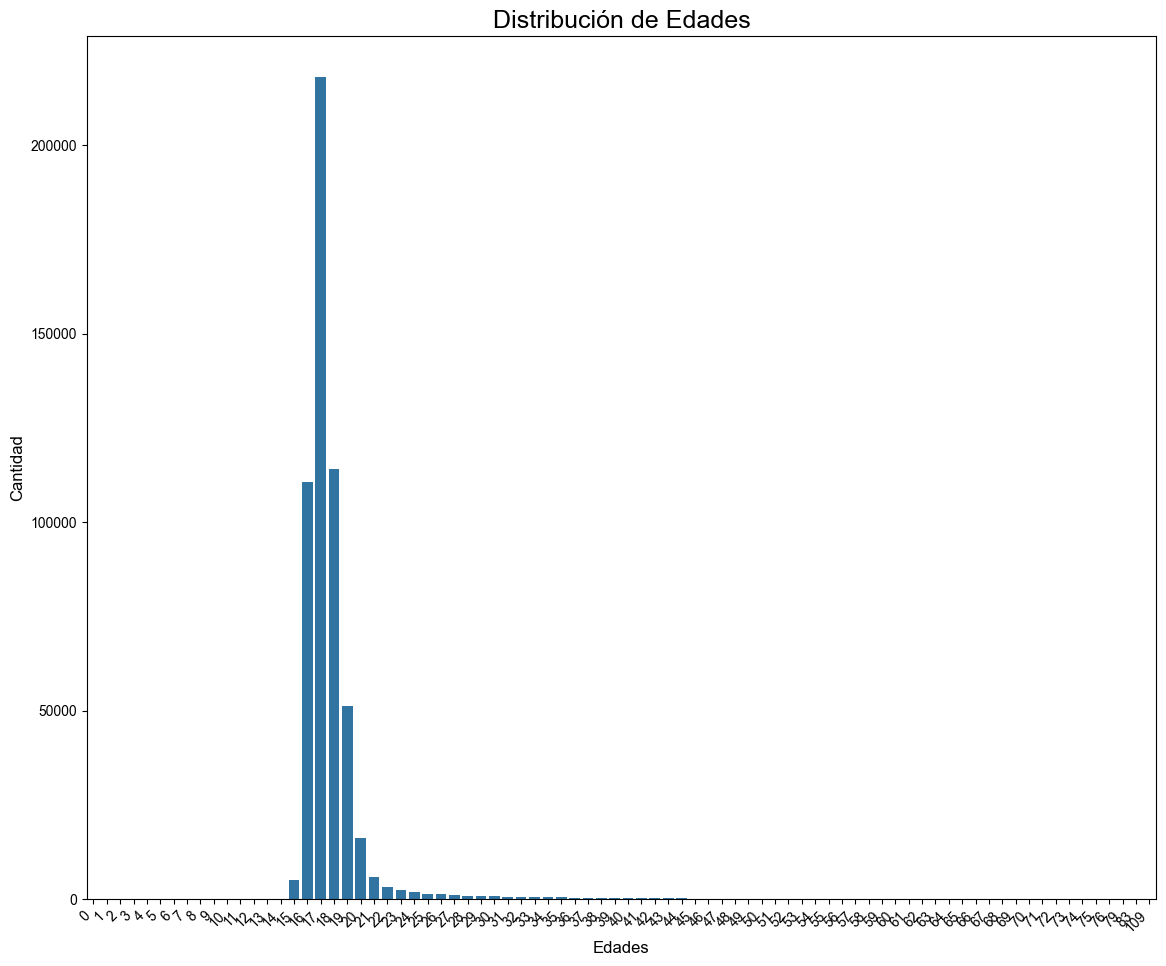

In [151]:
plt.figure(figsize = (12, 10))
sns.countplot(x = 'edad', data = icfes)
sns.set_theme(style = 'white', context = 'talk')

plt.title('Distribución de Edades')
plt.xlabel('Edades', fontsize = 12)
plt.ylabel('Cantidad', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [152]:
## Nos quedamos solo con las edades entre 14 y 79 años
icfes = icfes[(icfes["edad"] >= 14) & (icfes["edad"] <= 79)]

In [153]:
# Definir los límites de los bins
bins = list(range(15, 81, 5))  # De 15 a 80 en pasos de 5

# Crear etiquetas para los bins
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

# Crear la nueva variable 'grupo_edad'
icfes["grupo_edad"] = pd.cut(icfes["edad"], bins=bins, labels=labels, right=False)

# Verificar distribución
print(icfes["grupo_edad"].value_counts(dropna = False))

grupo_edad
15-19    499016
20-24     29831
25-29      5603
30-34      3285
35-39      2249
40-44      1401
45-49       897
50-54       632
55-59       377
NaN         184
60-64       159
65-69        73
70-74        23
75-79         8
Name: count, dtype: int64


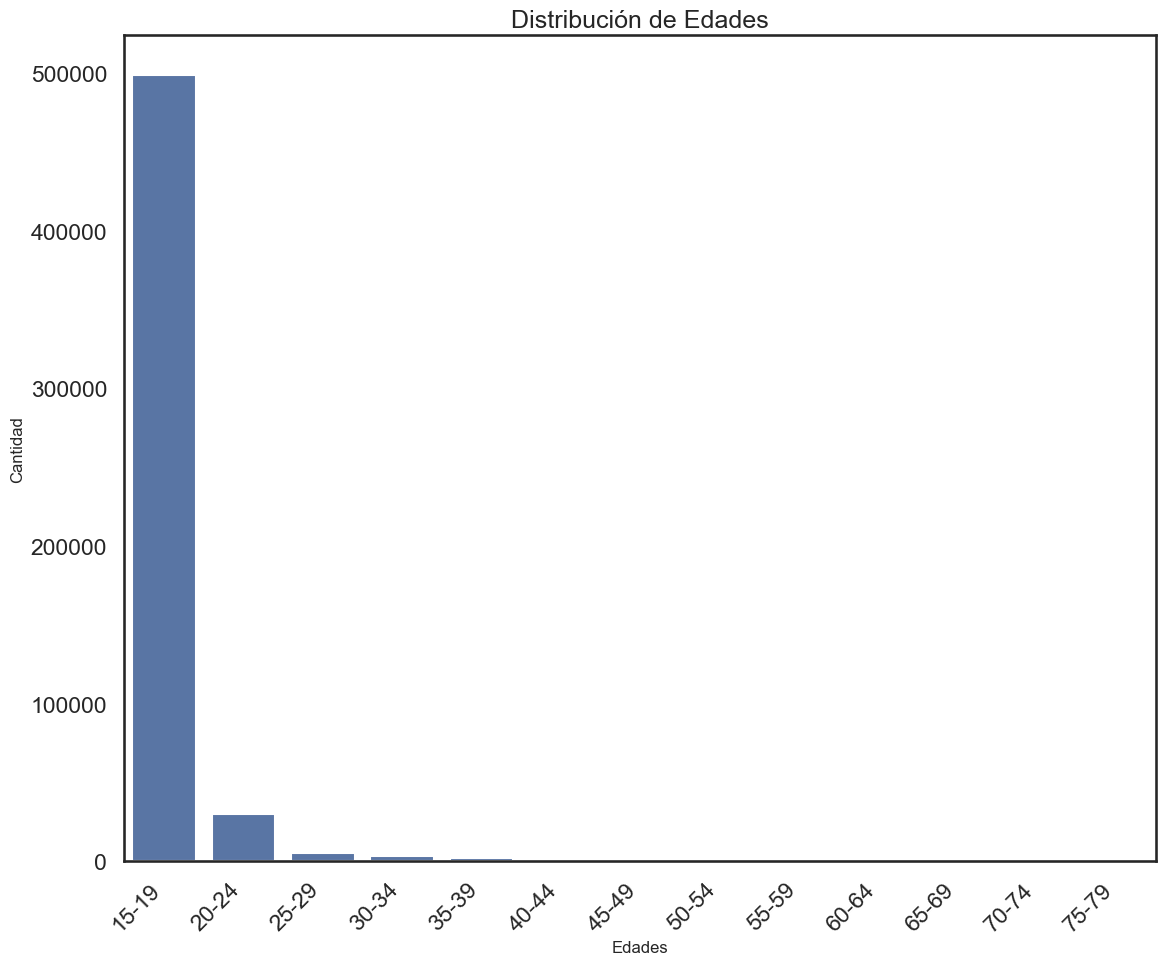

In [154]:
plt.figure(figsize = (12, 10))
sns.countplot(x = 'grupo_edad', data = icfes)
sns.set_theme(style = 'white', context = 'talk')

plt.title('Distribución de Edades')
plt.xlabel('Edades', fontsize = 12)
plt.ylabel('Cantidad', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [155]:
icfes["grupo_edad"].value_counts(dropna = False)

grupo_edad
15-19    499016
20-24     29831
25-29      5603
30-34      3285
35-39      2249
40-44      1401
45-49       897
50-54       632
55-59       377
NaN         184
60-64       159
65-69        73
70-74        23
75-79         8
Name: count, dtype: int64

In [156]:
# Crear la variable
icfes['presento_fuera_edad'] = (icfes['edad'] > 19).astype(int)

# Verificar distribución
print("Distribución de la variable:")
print(icfes['presento_fuera_edad'].value_counts())
print('------------------------------------------------------')
print(f"\nPorcentaje fuera de edad: {icfes['presento_fuera_edad'].mean():.2%}")
print('------------------------------------------------------')

# Verificar algunos casos
print("\nVerificación manual:")
print(icfes[['edad', 'presento_fuera_edad']].head(10))

# Estadísticas por grupo
print("\nEdad promedio por grupo:")
print(icfes.groupby('presento_fuera_edad')['edad'].agg(['count', 'mean', 'min', 'max']))

Distribución de la variable:
presento_fuera_edad
0    499200
1     44538
Name: count, dtype: int64
------------------------------------------------------

Porcentaje fuera de edad: 8.19%
------------------------------------------------------

Verificación manual:
   edad  presento_fuera_edad
0    17                    0
1    16                    0
2    18                    0
3    17                    0
4    17                    0
5    20                    1
6    17                    0
7    17                    0
8    17                    0
9    17                    0

Edad promedio por grupo:
                      count  mean  min  max
presento_fuera_edad                        
0                    499200 17.19   14   19
1                     44538 25.44   20   79


#### 5.3.8 Variables Geográficas

In [157]:
icfes['colegio_dpto'].value_counts(dropna = False)

colegio_dpto
Bogotá             82432
Antioquia          73878
Valle              38507
Cundinamarca       36846
Atlantico          32034
Santander          25614
Bolivar            25266
Cordoba            19864
Nariño             16893
Boyaca             16689
Magdalena          16479
Tolima             16276
Norte Santander    15872
Huila              14034
Cauca              13862
Cesar              13209
Meta               12493
Sucre              10868
Risaralda          10716
Caldas             10330
La Guajira          8803
Quindio             6425
Casanare            5927
Choco               4849
Caqueta             4648
Putumayo            4034
Arauca              3330
Guaviare            1011
Amazonas             817
San Andres           616
Vichada              496
Vaupes               352
Guainia              268
Name: count, dtype: int64

In [158]:
# Crear un diccionario con la asignación de departamentos a regiones
departamento_a_region = {
    # Región Andina
    'Antioquia': 'Andina', 'Boyaca': 'Andina', 'Caldas': 'Andina', 'Cundinamarca': 'Andina',
    'Huila': 'Andina', 'Norte Santander': 'Andina', 'Quindio': 'Andina',
    'Risaralda': 'Andina', 'Santander': 'Andina', 'Tolima': 'Andina', 'Bogotá': 'Andina',

    # Región Caribe
    'Atlantico': 'Caribe', 'Bolivar': 'Caribe', 'Cesar': 'Caribe', 'Cordoba': 'Caribe',
    'La Guajira': 'Caribe', 'Magdalena': 'Caribe', 'Sucre': 'Caribe','San Andres': 'Caribe',

    # Región Pacífica
    'Cauca': 'Pacífica', 'Choco': 'Pacífica', 'Nariño': 'Pacífica', 'Valle': 'Pacífica',

    # Región Orinoquía
    'Meta': 'Orinoquía', 'Arauca': 'Orinoquía', 'Casanare': 'Orinoquía', 'Vichada': 'Orinoquía',

    # Región Amazónica
    'Caqueta': 'Amazónica', 'Putumayo': 'Amazónica', 'Amazonas': 'Amazónica',
    'Guainia': 'Amazónica', 'Guaviare': 'Amazónica', 'Vaupes': 'Amazónica'
}

# Crear la nueva variable 'region' en el dataframe ICFES
icfes['region'] = icfes['colegio_dpto'].map(departamento_a_region)

# Verificar si hay departamentos sin asignación
print(icfes[icfes['region'].isna()]['colegio_dpto'].unique())

[]


## 6. Validación de la variable objetivo

### 6.1 Valores Faltantes

In [159]:
icfes['puntaje_global'].isna().sum()

np.int64(0)

### 6.2 Revisar Rango Lógico

In [162]:
icfes['puntaje_global'].describe().round(0)

count   543738.00
mean       246.00
std         51.00
min          0.00
25%        207.00
50%        243.00
75%        282.00
max        477.00
Name: puntaje_global, dtype: float64

### 6.3 Detectar Valores Extremos Sospechosos

In [178]:
# Extraer variable
y = icfes['puntaje_global'].dropna()

# Normalización (Z-score)
mu, sigma = y.mean(), y.std()
z_scores = (y - mu) / sigma

# Índices de los outliers (más allá de 3 desviaciones estándar)
outlier_idx = y.index[abs(z_scores) > 3]

# Crear DataFrame con índice, puntaje y z-score
df_outliers = pd.DataFrame({
    'indice': outlier_idx,
    'puntaje_global': y.loc[outlier_idx],
    'z_score': z_scores.loc[outlier_idx]
}).reset_index(drop=True)

# Ordenar por el valor del z-score
df_outliers = df_outliers.sort_values(by='z_score', ascending=False)

print(f"Número de outliers: {len(df_outliers)}")
df_outliers.head()


Número de outliers: 587


,indice,puntaje_global,z_score
435,410955,477,4.49
472,438921,475,4.45
42,24019,473,4.41
527,464600,467,4.30
236,227556,460,4.16


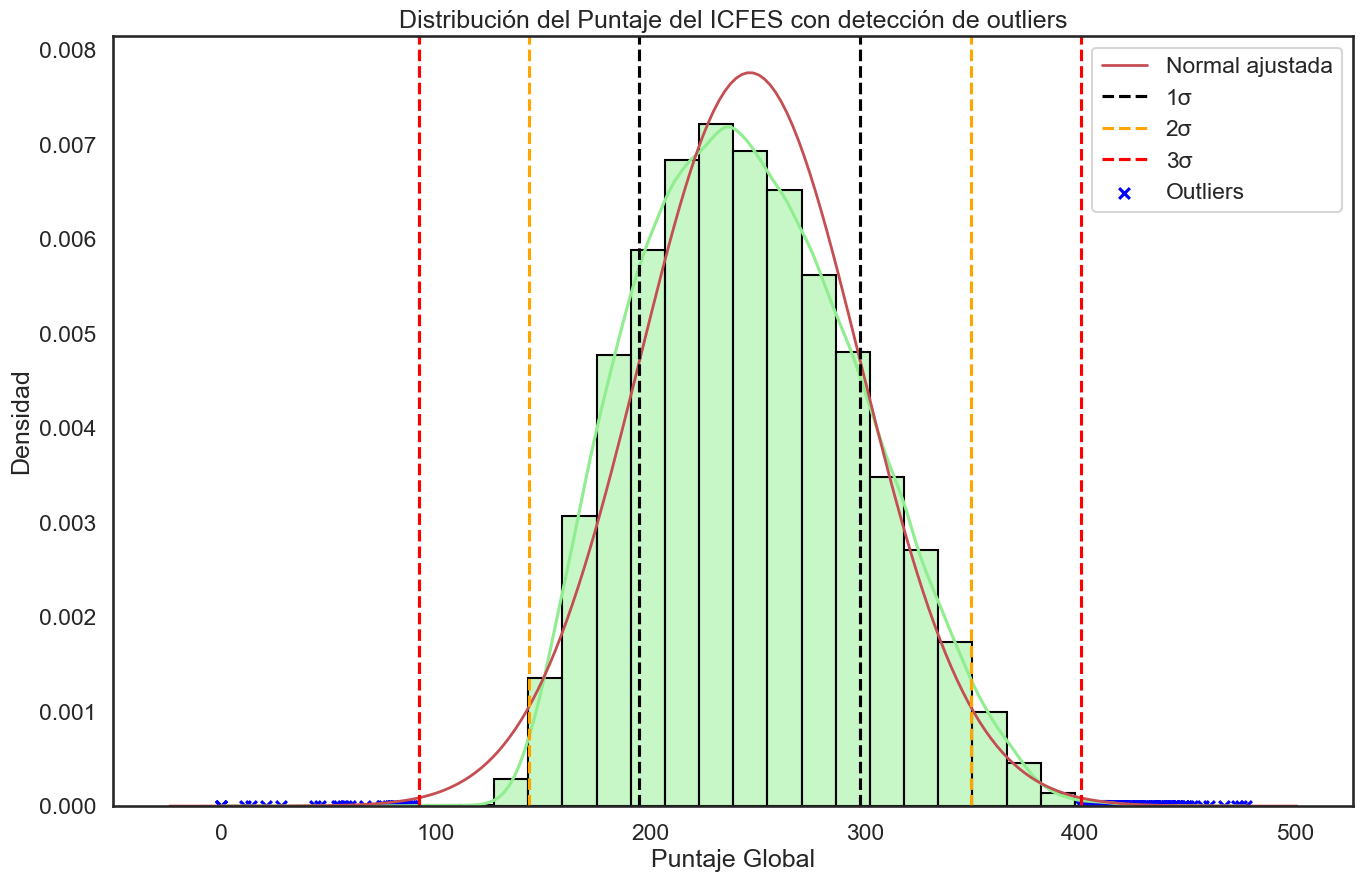

In [179]:
from scipy.stats import norm

plt.figure(figsize=(16,10))

# Histograma con KDE
sns.histplot(y, kde=True, stat="density", bins=30, color="lightgreen", edgecolor="black")

# Curva normal teórica
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 200)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r', lw=2, label="Normal ajustada")

# Líneas verticales de 1σ, 2σ, 3σ
for k, col in zip([1,2,3], ["black","orange","red"]):
    plt.axvline(mu + k*sigma, color=col, linestyle="--")
    plt.axvline(mu - k*sigma, color=col, linestyle="--", label=f"{k}σ")

# Graficar puntos outliers
plt.scatter(y.loc[outlier_idx], [0]*len(outlier_idx), 
            color="blue", marker="x", s=60, label="Outliers")

plt.title("Distribución del Puntaje del ICFES con detección de outliers")
plt.xlabel("Puntaje Global")
plt.ylabel("Densidad")
plt.legend()
plt.show()

## 7. Eliminar Variables y Guardar Dataset

In [ ]:
var_eli = ["est_mpio_presento_examen", "est_dpto_presento_examen", "fecha_nac", "año_nacimiento", 'pertenece_etnia', "dpto_est_reside", "mpio_est_reside"]

icfes = icfes.drop(columns=var_eli)
icfes.sample(4)

,nacionalidad,genero,etnia_estudiante,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,edad,grupo_edad,presento_fuera_edad,region
231842,Colombia,Masculino,No,Estrato 2,Hogar grande,3.00,Bachiller,Primaria,Sector Primario,Sector Primario,0,1,0,0,0,0,0,0,0-10,Insuficiente,Aceptable,Muy Insuficiente,Igual,30-60 min,Moderado,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Unica,Aguadas,Caldas,46,30,2,41,23,2,40,24,1,41,37,2,44.00,39,A-,211,27.00,37.34,1.00,2.00,17,15-19,0,Andina
83195,Colombia,Femenino,No,NaN,Hogar tradicional,5.00,Primaria,Bachiller,No Aplica,Sin Actividad Remunerada,1,1,0,1,0,0,1,1,11-25,Óptimo,Insuficiente,Aceptable,Mejor,No lee,Moderado,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Noche,Dosquebradas,Risaralda,37,8,2,19,1,1,27,1,1,28,6,1,24.00,1,A-,137,1.00,50.38,2.00,2.00,22,20-24,1,Andina
129167,Colombia,Masculino,No,Estrato 3,Hogar tradicional,2.00,Primaria Inc,Bachiller Inc,Sector Primario,Sin Actividad Remunerada,1,0,0,1,1,0,0,0,11-25,Insuficiente,Insuficiente,Muy Insuficiente,Igual,0-30 min,Moderado,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Rural,Mañana,Guarne,Antioquia,57,68,3,61,81,3,56,77,3,53,70,2,41.00,31,A-,278,72.00,41.22,2.00,2.00,18,15-19,0,Andina
24918,Colombia,Masculino,No,Estrato 5,Hogar tradicional,4.00,Profesional,Bachiller Inc,Pensionado,Pensionado,1,1,1,1,1,1,1,1,26-100,Óptimo,Óptimo,Óptimo,Mejor,0-30 min,Moderado,Tiempo Parcial Reducido,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Sabaneta,Antioquia,64,86,3,56,68,3,63,91,3,60,86,3,54.00,70,A1,301,84.00,66.93,4.00,3.00,19,15-19,0,Andina


In [181]:
orden_variables = ['nacionalidad', 'genero', 'region', 'etnia_estudiante', 'edad', 'grupo_edad', 'presento_fuera_edad', 'num_personas_casa', 'num_cuartos_casa', 'estrato_casa',
                   'tiempo_internet', 'internet', 'tv', 'computador', 'lavadora', 'microndas', 'carro', 'moto', 'consola', 'situacion_economica_casa',
                   'num_libros', 'tiempo_lectura', 'freq_leche_derivados', 'freq_carne_pescado_similares', 'freq_cereales_frutos_legumbres',
                   'nivel_edu_padre', 'actividad_padre', 'nivel_edu_madre', 'actividad_madre', 'horas_trabajo_semanal', 'tipo_remuneracion',
                   'colegio_genero', 'colegio_naturaleza', 'colegio_calendario', 'colegio_caracter', 'colegio_area', 'colegio_jornada', 'colegio_mpio', 'colegio_dpto', 'puntaje_lectura',
                   'percentil_lectura', 'puntaje_matematicas', 'percentil_matematicas', 'nivel_matematicas', 'puntaje_naturales', 'percentil_naturales', 'nivel_naturales', 'puntaje_sociales', 
                   'percentil_sociales', 'nivel_sociales', 'puntaje_ingles', 'percentil_ingles', 'nivel_ingles', 'puntaje_global', 'percentil_global', 'inse_estudiante', 
                   'nse_estudiante', 'nse_colegio']

icfes = icfes[orden_variables]

In [184]:
icfes.sample(4)

,nacionalidad,genero,region,etnia_estudiante,edad,grupo_edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,situacion_economica_casa,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
179787,Colombia,Femenino,Pacífica,Paez,16,15-19,0,Más de 1 hogar,5.00,Estrato 2,Promedio,0,1,0,0,0,0,1,0,Igual,11-25,0-30 min,Insuficiente,Óptimo,Insuficiente,Primaria,Sin Actividad Remunerada,Primaria Inc,Sin Información,No Trabaja,No Aplica,Mixto,Oficial,A,S,Rural,Completa,Santander De Quilichao,Cauca,41,16,47,39,2,43,34,2,33,16,1,36.00,17,A-,203,22.00,40.28,1.00,2.00
342151,Colombia,Masculino,Caribe,No,17,15-19,0,Hogar grande,3.00,Estrato 3,Promedio,1,1,1,1,1,1,1,0,Mejor,26-100,0-30 min,Óptimo,Insuficiente,Aceptable,Bachiller Inc,Profesionales,Profesional,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Completa,Lorica,Cordoba,23,1,40,19,2,39,20,1,43,43,2,48.00,51,A1,186,13.00,61.33,3.00,3.00
327132,Colombia,Femenino,Andina,No,17,15-19,0,Hogar tradicional,3.00,Estrato 3,Mucho,1,1,1,1,1,0,1,0,Igual,0-10,30-60 min,Óptimo,Óptimo,Aceptable,Bachiller,NaN,Bachiller,Trabajadores Operativos,No Trabaja,No Aplica,Mixto,No Oficial,A,S,Urbano,Mañana,Bucaramanga,Santander,47,32,40,21,2,47,48,2,45,49,2,50.00,58,A1,226,37.00,56.01,3.00,2.00
498643,Colombia,Femenino,Caribe,No,17,15-19,0,Hogar tradicional,3.00,Estrato 2,Ninguno,0,1,0,0,0,0,0,0,Peor,0-10,30-60 min,Insuficiente,Aceptable,Insuficiente,Primaria Inc,Sin Actividad Remunerada,Primaria Inc,Trabajador Independiente,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,33,4,48,41,2,35,11,1,30,9,1,43.00,38,A-,185,12.00,38.37,1.00,2.00


In [183]:
# Guardar DataFrame en parquet
icfes.to_parquet("C:/Users/CACTU/Downloads/Proyectos/prediccion-icfes-colombia/data/procesada/icfes_limpio.parquet", index=False, engine="pyarrow")